In [1]:
import numpy as np # linear algerbra
import pandas as pd # data processing
import seaborn as sns # data visualization
import matplotlib.pyplot as plt #drawing
from sklearn.model_selection import train_test_split


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Importing and Exploring Dataset
#### First, we check the basic info of the dataset(trainset and testset)

In [2]:
data = pd.read_csv('../ProjectBookRatingPredictions/DataSet/Train_data.csv',error_bad_lines=False)
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,eng,374,71853,646,1/1/2007,HarperTrophy
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,en-US,384,1051,47,1/1/2002,Avon Books
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,eng,167,1840,245,10/1/2006,Chicken House / Scholastic
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,en-US,80,162,11,3/1/2001,Scholastic Paperbacks
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,eng,393,50169,2117,2/7/2002,Vintage


In [3]:
test = pd.read_csv('../ProjectBookRatingPredictions/DataSet/Test_data.csv',error_bad_lines=False)
test.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,28898,Fundamentals of Heat and Mass Transfer [with I...,Frank P. Incropera/David P. DeWitt,NaN,0470055545,9780470055540,en-US,997,6,0,10/30/2006,Wiley
1,39358,Stud Rites (A Dog Lover's Mystery #9),Susan Conant,NaN,0425201597,9780425201596,eng,237,322,16,3/1/2005,Berkley Prime Crime Books
2,32695,El talismán,Stephen King/Peter Straub/Pilar Giralt Gorina,NaN,8408042432,9788408042433,spa,375,12,1,7/1/2003,Planeta Publishing
3,15096,Five Quarters of the Orange,Joanne Harris,NaN,0060958022,9780060958022,eng,307,26258,1936,6/4/2002,Harper Perennial
4,15428,Up in a Heaval (Xanth #26),Piers Anthony,NaN,0812574990,9780812574999,eng,342,2364,25,10/19/2003,Tor Fantasy


In [4]:
data.describe() # Generate the summary table of the data

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000
mean,21266.538300,3.935645,9.763290e+12,336.340000,1.874233e+04,555.690600
std,13081.040856,0.345856,4.035128e+11,234.721368,1.178498e+05,2672.388675
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10230.000000,3.780000,9.780345e+12,194.000000,1.060000e+02,9.000000
50%,20261.000000,3.960000,9.780571e+12,300.000000,7.440000e+02,47.000000
75%,31986.750000,4.130000,9.780872e+12,416.000000,5.005500e+03,241.000000
max,45641.000000,5.000000,9.790008e+12,4736.000000,4.597666e+06,94265.000000


In [5]:
test.describe() # Generate the summary table of the testset

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,1000.000000,0.0,1.000000e+03,1000.000000,1000.000000,1000.00000
mean,21563.620000,NaN,9.723212e+12,339.037000,11178.416000,437.94100
std,13255.081966,NaN,7.439213e+11,300.059186,41155.854102,1533.60982
min,9.000000,NaN,2.004913e+10,0.000000,0.000000,0.00000
25%,10502.750000,NaN,9.780376e+12,191.750000,91.750000,9.00000
50%,19632.500000,NaN,9.780672e+12,292.000000,781.500000,46.00000
75%,32855.500000,NaN,9.780887e+12,409.000000,5149.750000,216.25000
max,45546.000000,NaN,9.789999e+12,6576.000000,541914.000000,23793.00000


In [6]:
data.info() # Check basic features and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10000 non-null  int64  
 1   title               10000 non-null  object 
 2   authors             10000 non-null  object 
 3   average_rating      10000 non-null  float64
 4   isbn                10000 non-null  object 
 5   isbn13              10000 non-null  int64  
 6   language_code       10000 non-null  object 
 7     num_pages         10000 non-null  int64  
 8   ratings_count       10000 non-null  int64  
 9   text_reviews_count  10000 non-null  int64  
 10  publication_date    10000 non-null  object 
 11  publisher           10000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 937.6+ KB


In [7]:
test.info() # Check testset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              1000 non-null   int64  
 1   title               1000 non-null   object 
 2   authors             1000 non-null   object 
 3   average_rating      0 non-null      float64
 4   isbn                1000 non-null   object 
 5   isbn13              1000 non-null   int64  
 6   language_code       1000 non-null   object 
 7     num_pages         1000 non-null   int64  
 8   ratings_count       1000 non-null   int64  
 9   text_reviews_count  1000 non-null   int64  
 10  publication_date    1000 non-null   object 
 11  publisher           1000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB


In [8]:
data.duplicated().any() # Check for doublication

False

In [9]:
test.duplicated().any()

False

<AxesSubplot:>

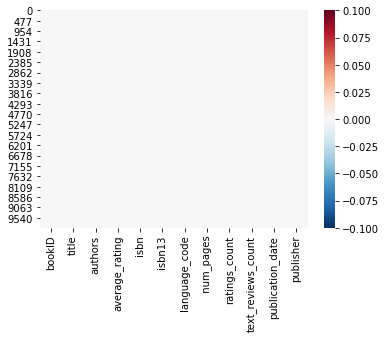

In [10]:
sns.heatmap(data.isnull(), cmap='RdBu_r') #Check if null in trainset

<AxesSubplot:>

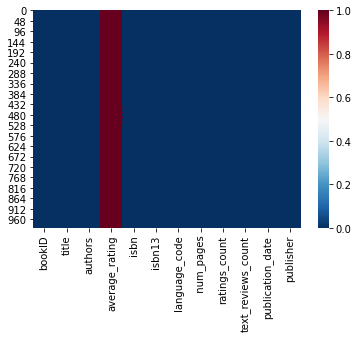

In [11]:
sns.heatmap(test.isnull(), cmap='RdBu_r') # Check if null in testset

#### No duplicated or missing values in the trainset, then we do data visualisation to further explore it.
#### And that will help us to do the data cleaning and feature engineering

# Data Visualisation

Text(0, 0.5, 'Frequency')

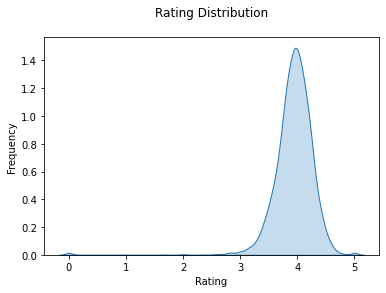

In [12]:
# rating distribution
sns.kdeplot(data['average_rating'],shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

#### we can see that most books are rated around 4

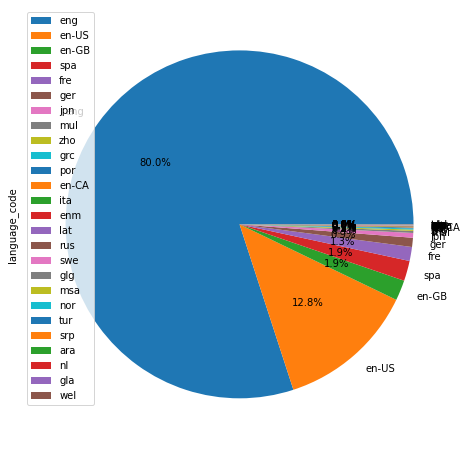

In [13]:
# top languages
data['language_code'].value_counts().head(100).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

#### The most used language in books is English

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '3.83'),
  Text(1, 0, '3.89'),
  Text(2, 0, '3.92'),
  Text(3, 0, '3.93'),
  Text(4, 0, '3.94'),
  Text(5, 0, '3.96'),
  Text(6, 0, '4.0'),
  Text(7, 0, '4.02'),
  Text(8, 0, '4.05'),
  Text(9, 0, '4.07')])

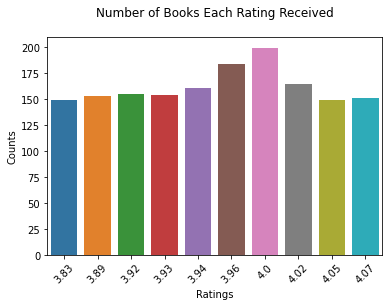

In [14]:
# number of books per rating
sns.barplot(data['average_rating'].value_counts().head(10).index, data['average_rating'].value_counts().head(10))
plt.title('Number of Books Each Rating Received\n')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='ratings_count', ylabel='title'>

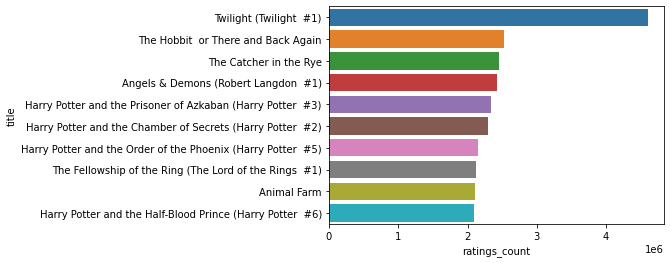

In [15]:
# highest rated books
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

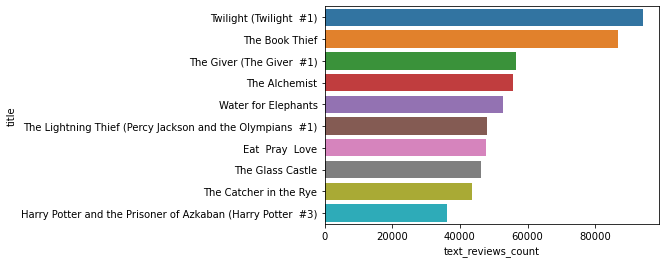

In [16]:
# highest reviewed books
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])

Text(0.5, 0, 'Total Ratings')

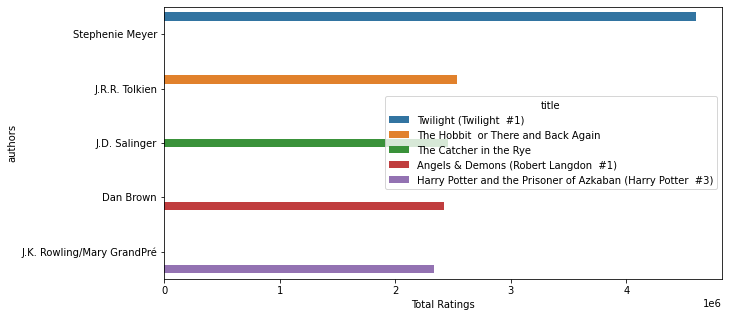

In [17]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
authors = data.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(authors['ratings_count'], authors.index, ci = None, hue = authors['title'])
plt.xlabel('Total Ratings')

Text(0.5, 0, 'No. of Publications')

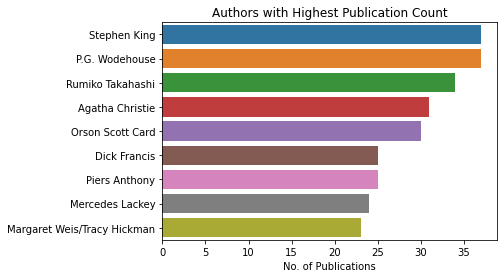

In [18]:
# authors with highest publications
top_authors = data['authors'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title('Authors with Highest Publication Count')
plt.xlabel('No. of Publications')

# NLP in title
we use LDA to extract some topics from the title of all books, and select the most probable topic as a new feature for each book.

In [19]:
import nltk
import re
nltk.download('punkt')

data['cleaned_title']=data['title']
for i in range(0, len(data)):
    token_title = nltk.tokenize.word_tokenize((data['title'][i]))
    token_title_without_symbol = [w for w in token_title if w in re.sub("[^a-zA-Z]", " ", w)]
    string_title=""
    for j in token_title_without_symbol:
        string_title += j+" "
    string_title = string_title.lower()
    data['cleaned_title'][i] = string_title 
    
print(data['cleaned_title'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LiuYiNan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                little town on the prairie little house 
1                  first comes love hot water california 
2                               when santa fell to earth 
3       the case of the stinky science project jigsaw ...
4                                      dance dance dance 
                              ...                        
9995                                  bulfinch mythology 
9996                                    the white castle 
9997                                         a fan notes 
9998                        la ciudad perdida numa files 
9999                       the church and the second sex 
Name: cleaned_title, Length: 10000, dtype: object


In [20]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

words = stopwords.words('english')
data['cleaned_title'] = data['cleaned_title'].apply(lambda x:" ".join([i
for i in re.sub("[^a-zA-Z]"," ",x).split() if i not in words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LiuYiNan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [i for i in data['cleaned_title']]
cntVector=CountVectorizer()
cntTF=cntVector.fit_transform(corpus)

In [22]:
print(corpus)

['little town prairie little house', 'first comes love hot water california', 'santa fell earth', 'case stinky science project jigsaw jones', 'dance dance dance', 'tolkien companion guide volume reader guide', 'mapping big picture integrating curriculum assessment', 'burglar thought bogart bernie rhodenbarr', 'prime miss jean brodie girls slender means driver seat problem', 'desperation regulators box set', 'breaking spell religion natural phenomenon', 'prime time', 'love saturdays domingos', 'christmas noisy village', 'search memory emergence new science mind', 'wapshot chronicle', 'gardens emily dickinson', 'gates fire', 'drama gifted child search true self', 'buenos presagios las buenas ajustadas de agnes la chalada', 'sister keeper', 'ca happen', 'english novel introduction', 'woman born', 'call moon', 'roger zelazny rule amber dawn amber', 'discovery dive', 'rise christianity', 'stranger came ashore', 'four weddings funeral', 'mutants masterminds rpg', 'adventures extremists', 'vo

In [23]:
print(cntTF)

  (0, 5141)	2
  (0, 8937)	1
  (0, 6845)	1
  (0, 4232)	1
  (1, 3263)	1
  (1, 1701)	1
  (1, 5224)	1
  (1, 4226)	1
  (1, 9522)	1
  (1, 1212)	1
  (2, 7629)	1
  (2, 3182)	1
  (2, 2654)	1
  (3, 1315)	1
  (3, 8405)	1
  (3, 7700)	1
  (3, 6948)	1
  (3, 4654)	1
  (3, 4683)	1
  (4, 2106)	3
  (5, 8879)	1
  (5, 1734)	1
  (5, 3841)	2
  (5, 9430)	1
  (5, 7167)	1
  :	:
  (9988, 3792)	1
  (9989, 3665)	1
  (9989, 6096)	1
  (9990, 2180)	1
  (9990, 3931)	1
  (9992, 7676)	1
  (9992, 3535)	1
  (9992, 463)	1
  (9993, 3404)	1
  (9994, 7790)	1
  (9994, 8417)	1
  (9995, 5978)	1
  (9995, 1144)	1
  (9996, 9605)	1
  (9996, 1327)	1
  (9997, 6166)	1
  (9997, 3118)	1
  (9998, 4900)	1
  (9998, 3222)	1
  (9998, 6191)	1
  (9998, 6557)	1
  (9998, 1558)	1
  (9999, 7758)	1
  (9999, 7858)	1
  (9999, 1538)	1


In [24]:
from sklearn.decomposition import LatentDirichletAllocation
#参数可调n_componenets是对于一个title生成几个可能的主题，max_itr迭代次数
lda = LatentDirichletAllocation(n_components =10, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
docres = lda.fit_transform(cntTF)

In [25]:
#每个title会有n个可能的主题，选出中最可能的那一个主题，返回主题的index作为feature
topics_for_each_title = []
for i in range(0, len(data)):
    temp = docres[i].tolist()
    topic = temp.index(max(temp))
    topics_for_each_title.append(topic)
# print(topics_for_each_title)
#这里开始是把这个feature加到dataFrame中作为一个feature
data['title_topic'] = topics_for_each_title
print(data['title_topic'])

0       2
1       2
2       6
3       9
4       9
       ..
9995    0
9996    0
9997    7
9998    9
9999    6
Name: title_topic, Length: 10000, dtype: int64


In [26]:
data.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,eng,374,71853,646,1/1/2007,HarperTrophy,little town prairie little house,2
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,en-US,384,1051,47,1/1/2002,Avon Books,first comes love hot water california,2
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,eng,167,1840,245,10/1/2006,Chicken House / Scholastic,santa fell earth,6
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,en-US,80,162,11,3/1/2001,Scholastic Paperbacks,case stinky science project jigsaw jones,9
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,eng,393,50169,2117,2/7/2002,Vintage,dance dance dance,9
5,23601,The J.R.R. Tolkien Companion and Guide Volume...,Wayne G. Hammond/Wayne G. Hammond,4.46,0618391010,9780618391011,eng,1262,31,2,11/2/2006,Houghton Mifflin Harcourt,tolkien companion guide volume reader guide,9
6,92,Mapping the Big Picture: Integrating Curriculu...,Heidi Hayes Jacobs,3.68,0871202867,9780871202864,en-US,108,77,2,1/28/1997,Association for Supervision & Curriculum Devel...,mapping big picture integrating curriculum ass...,2
7,39501,The Burglar Who Thought He Was Bogart (Bernie ...,Lawrence Block,3.89,0060872799,9780060872793,en-US,400,2134,99,10/31/2006,HarperTorch,burglar thought bogart bernie rhodenbarr,1
8,37387,The Prime of Miss Jean Brodie / The Girls of S...,Muriel Spark,3.79,1857152743,9781857152746,eng,512,1477,90,5/6/2004,Random House,prime miss jean brodie girls slender means dri...,5
9,32715,Desperation / The Regulators: Box Set,Stephen King/Richard Bachman,4.07,067077605X,9780670776054,eng,1075,3231,72,10/1/1996,Viking Adult,desperation regulators box set,2


In [27]:
data.shape

(10000, 14)

# Map-Reduce
we use map-reduce to convert the publication date string to UNIX timestamp, and this is parts of data preprocessing.

In [28]:
#The map-reduce algorithm to convert date string to timestamp
data.loc[data.bookID == 31373, 'publication_date'] = '10/01/1999'
data.loc[data.bookID == 45531, 'publication_date'] = '10/01/1975'
import time
import datetime
#The map function returns like 1/1/2007,2007-07-01 00:00:00

def map():
    kv=[]
    for i in range(0, len(data)):
        mm,dd,yyyy = data['publication_date'][i].split('/')
        date = data['publication_date'][i]
        value = yyyy+"-"+mm+"-"+dd+" "+"00:00:00"
        kv.append([date, value])
    return kv

#works for before 1970 and later
def reduce(kv):
    value=[]
    for i in range(0, len(kv)):
        key = kv[i][0]
        date_and_time = datetime.datetime.strptime(kv[i][1], "%Y-%m-%d %H:%M:%S")
        start_time = datetime.datetime.strptime("1970-01-01 00:00:00","%Y-%m-%d %H:%M:%S" )
        difference_time = date_and_time - start_time
        value_i = difference_time.days*24*3600 + difference_time.seconds
        value.append(value_i)
    return value
kv=map()

timestamp = reduce(kv)

In [29]:
print(timestamp)

[1167609600, 1009843200, 1159660800, 983404800, 1013040000, 1162425600, 854409600, 1162252800, 1083801600, 844128000, 1140739200, 809913600, 1093996800, 373161600, 1138752000, 1054598400, 1128124800, 1127779200, 423273600, 1114387200, 1078790400, 1128384000, 1091750400, 920246400, 1230768000, 1128124800, 1054425600, 863136000, 229132800, 829526400, 1130803200, 1041897600, 683683200, 1171843200, 1007164800, 1139875200, 1016064000, 1077580800, 979776000, 854755200, 1046476800, 1120176000, 1104537600, 1126742400, 1168300800, 1139875200, 455846400, 668822400, 778377600, 1072742400, 862444800, 1115078400, 1113696000, 1000944000, 746841600, 959817600, 1139270400, 1109635200, 1079308800, 1160524800, 1101859200, 1014940800, 720144000, 888710400, 1046131200, -460339200, 651801600, 967766400, 1164672000, 1095984000, 1159833600, 1071360000, 1155600000, 1041379200, 877219200, 746841600, 1127088000, 532137600, 297043200, 1099872000, 953596800, 854496000, 1074556800, 454896000, 1017878400, 115188480

In [30]:
data['timestamp']= timestamp

In [31]:
data['timestamp']

0       1167609600
1       1009843200
2       1159660800
3        983404800
4       1013040000
           ...    
9995     693532800
9996     964569600
9997     870739200
9998    1162857600
9999     505094400
Name: timestamp, Length: 10000, dtype: int64

# Data Preprocessing
**Next, we do the Data Cleaning and Feature Engineering**

### 1. Data Cleaning
We try to find and remove some extreme outliers from the features, since these values are abnormal distance from others, keeping them won't give any help to the accurancy of the model.

#### num_pages:

In [32]:
#first we remove the spaces of feature num_pages
data.rename(columns={"  num_pages":"num_pages"}, inplace=True)

<AxesSubplot:xlabel='num_pages'>

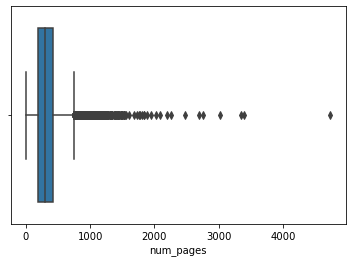

In [33]:
# find the outliers of num_pages
sns.boxplot(x=data['num_pages'])

The boxplot shows points between 1000 to 6000, the outliers are not included in the quartiles. So we drop them.

In [34]:
# remove outliers from pages number
data = data.drop(data.index[data['num_pages'] >= 1000])

In [35]:
data.shape

(9805, 15)

#### ratings_count:

<AxesSubplot:xlabel='ratings_count'>

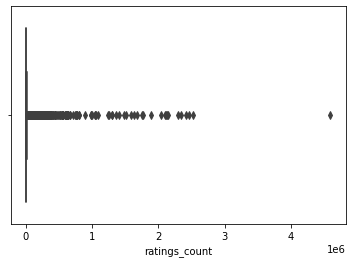

In [36]:
# find outliers of ratings_count
sns.boxplot(x=data['ratings_count'])

In [37]:
# remove outliers from ratings_count
data = data.drop(data.index[data['ratings_count'] >= 1000000])

In [38]:
# check meaningless rating
data[data['ratings_count'] == 0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp
103,15186,American Film Guide,Frank N. Magill,0.00,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc,american film guide,9,410227200
169,42863,Mission Possible,Kenneth H. Blanchard,3.44,0071348271,9780071348270,eng,242,0,0,4/30/1999,McGraw-Hill Companies,mission possible,1,925430400
480,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.00,0415940478,9780415940474,eng,386,0,0,11/8/2002,Routledge,man author john milton twentieth century persp...,3,1036713600
518,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.00,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan,brodie notes aldous huxley brave new world,7,714268800
559,38710,Super Fast Out of Control,Louis Sachar,3.75,0747566828,9780747566823,eng,128,0,0,5/2/2005,Bloomsbury Publishing PLC,super fast control,3,1114992000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8710,24749,American Writers Supplement VIII,Jay Parini/August Wilson,0.00,0684806371,9780684806372,eng,400,0,0,5/1/2001,Gale Cengage,american writers supplement viii,3,988675200
9296,2411,Melville and the politics of identity: From *K...,Julian Markels,3.33,0252063023,9780252063022,eng,164,0,0,7/1/1993,University of Illinois Press,melville politics identity,3,741484800
9619,39580,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5.00,089096940X,9780890969403,eng,314,0,0,5/1/2000,Texas A&M University Press,american campaign presidential campaigns natio...,7,957139200
9808,3084,April May und June,Elizabeth von Arnim,3.88,345833422X,9783458334224,ger,88,0,0,4/1/1995,Insel Frankfurt,april may und june,6,796694400


In [39]:
# And then drop them
data = data.drop(data.index[data['ratings_count'] == 0])

In [40]:
data.shape

(9707, 15)

#### text_reviews_count:

<AxesSubplot:xlabel='text_reviews_count'>

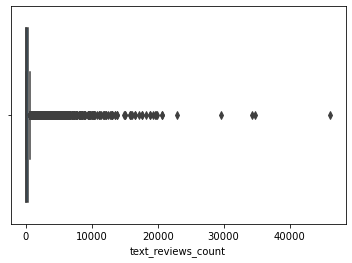

In [41]:
#find outliers of text_reviews_count
sns.boxplot(x=data['text_reviews_count'])

In [42]:
# remove outliers from text_reviews_count
data = data.drop(data.index[data['text_reviews_count'] >= 20000])

In [43]:
data.shape

(9700, 15)

### 2. Feature Engineering

#### language_code:

First we unify all the english language, and then we convert it into ordinal integers

In [44]:
from sklearn.preprocessing import OrdinalEncoder

encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}} 
data.replace(encoding, inplace=True)

enc = OrdinalEncoder()
enc.fit(data[['language_code']])
data[['language_code']] = enc.fit_transform(data[['language_code']]) 

#### publication_date:

Then we convert data type of publication_date from object into date type

In [45]:
data['publication_date'] = pd.to_datetime(data['publication_date'], format='%m/%d/%Y', errors='coerce') 

In [46]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,1.0,374,71853,646,2007-01-01,HarperTrophy,little town prairie little house,2,1167609600
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,1.0,384,1051,47,2002-01-01,Avon Books,first comes love hot water california,2,1009843200
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,1.0,167,1840,245,2006-10-01,Chicken House / Scholastic,santa fell earth,6,1159660800
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,1.0,80,162,11,2001-03-01,Scholastic Paperbacks,case stinky science project jigsaw jones,9,983404800
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,1.0,393,50169,2117,2002-02-07,Vintage,dance dance dance,9,1013040000


and check if there is null in this feature(publication_date)

In [47]:
data[data['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp


Since there are only 2 books with null values in publication_date, we simply drop them.

In [48]:
data.shape

(9700, 15)

In [49]:
data.dropna(how = 'any',inplace =True)

check again

In [50]:
data[data['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp


Then we extract 'year','month' and 'day' respectively to three new features.

In [51]:
#data['year'] = pd.DatetimeIndex(data['publication_date']).year

In [52]:
#data['month'] = pd.DatetimeIndex(data['publication_date']).month 

In [53]:
#data['day'] = pd.DatetimeIndex(data['publication_date']).day

In [54]:
#data.head()

#### title:

By adding a new feature named num_occ, which means the occurrence of each title, we can check if there are some duplicate books title.

In [55]:
data['num_occ'] = data.groupby('title')['title'].transform('count')

In [56]:
data[data["num_occ"] > 1]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp,num_occ
8,37387,The Prime of Miss Jean Brodie / The Girls of S...,Muriel Spark,3.79,1857152743,9781857152746,1.0,512,1477,90,2004-05-06,Random House,prime miss jean brodie girls slender means dri...,5,1083801600,2
18,4888,The Drama of the Gifted Child: The Search for ...,Alice Miller,4.09,046501691X,9780465016914,1.0,118,97,10,1983-06-01,Basic Books,drama gifted child search true self,1,423273600,2
31,1823,Them: Adventures with Extremists,Jon Ronson,3.95,0743233212,9780743233217,1.0,336,11990,831,2003-01-07,Simon Schuster,adventures extremists,1,1041897600,2
45,32656,The Return of the Native,Thomas Hardy/Phillip Mallett,3.86,0393927873,9780393927870,1.0,552,44,5,2006-02-14,W. W. Norton & Company,return native,0,1139875200,2
55,23802,Bargaining for Advantage: Negotiation Strategi...,G. Richard Shell,3.95,0140281916,9780140281910,1.0,304,37,1,2000-06-01,Penguin Books,bargaining advantage negotiation strategies re...,6,959817600,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,6388,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0385504217,9780385504218,1.0,522,2780,334,2003-03-18,Doubleday Publishing (NY),da vinci code robert langdon,2,1047945600,3
9982,30289,The Republic,Plato/Desmond Lee/Maria Helena da Rocha Pereir...,3.94,0140449140,9780140449143,1.0,416,136467,2013,2003-02-25,Penguin Classics,republic,3,1046131200,2
9989,42029,Girls' Night In,Jessica Adams/Chris Manby/Fiona Walker,3.26,0006514855,9780006514855,1.0,586,140,11,2000-07-03,HarperCollins,girls night,5,962582400,2
9991,15688,L'Étranger,Albert Camus,3.98,2070360024,9782070360024,3.0,184,13454,765,2000-03-02,Gallimard,,0,951955200,2


We do the following processingg:
1.For the pages number and average rating of each duplicate books, we take the average value of them.
2.For the text reviews count and ratings count, we calculate the total value.

In [57]:
data['num_pages'] = data.groupby('title')['num_pages'].transform('mean')

In [58]:
data['average_rating'] = data.groupby('title')['average_rating'].transform('mean')

In [59]:
data['text_reviews_count'] = data.groupby('title')['text_reviews_count'].transform('sum') 

In [60]:
data['ratings_count'] = data.groupby('title')['ratings_count'].transform('sum')

Then we eliminate the duplicate books, and delete the new feature we use to find the duplicated.

In [61]:
data= data[~data.duplicated(subset='title')] 

In [62]:
data.drop(['num_occ'], axis=1, inplace=True)

In [63]:
data.shape

(9095, 15)

In [64]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,1.0,374.0,71853,646,2007-01-01,HarperTrophy,little town prairie little house,2,1167609600
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,1.0,384.0,1051,47,2002-01-01,Avon Books,first comes love hot water california,2,1009843200
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,1.0,167.0,1840,245,2006-10-01,Chicken House / Scholastic,santa fell earth,6,1159660800
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,1.0,80.0,162,11,2001-03-01,Scholastic Paperbacks,case stinky science project jigsaw jones,9,983404800
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,1.0,393.0,50169,2117,2002-02-07,Vintage,dance dance dance,9,1013040000


#### num_pages:

We find the value of feature num_pages in some books is zero, we use mode to fill them.

In [65]:
# check 0 value in num_pages
data[data['num_pages'] == 0].head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp
278,22077,The Michael Crichton Collection: Jurassic Park...,Michael Crichton/Chris Noth/Anthony Heald,4.29,0375415807,9780375415807,1.0,0.0,107,3,2000-06-09,Random House Audio,michael crichton collection jurassic park lost...,3,960508800
307,21365,From the Corner of His Eye,Dean Koontz/Stephen Lang,4.03,0553502697,9780553502695,1.0,0.0,29,3,2000-12-26,Random House Audio Publishing Group,corner eye,7,977788800
424,17766,Master and Commander (Aubrey/Maturin Book 1),Patrick O'Brian,4.10,073931565X,9780739315651,1.0,0.0,1,0,2004-03-09,Random House Audio,master commander book,3,1078790400
777,44748,The Mask of the Enchantress,Victoria Holt,3.85,0449210847,9780449210840,1.0,0.0,21,1,1981-10-12,Ivy Books,mask enchantress,2,371692800
779,13106,The Celestine Prophecy,James Redfield/Lou Diamond Phillips,3.64,1594831955,9781594831959,1.0,0.0,64,10,2006-02-16,Grand Central Publishing,celestine prophecy,9,1140048000
851,26327,The Power of Truth: A Leading with Emotional I...,Daniel Goleman/Warren Bennis,3.82,1593979746,9781593979744,1.0,0.0,11,2,2006-11-14,Macmillan Audio,power truth leading emotional intelligence con...,3,1163462400
877,7674,The Michael Crichton Collection: Airframe / Th...,Michael Crichton/Stephen Lang/Anthony Heald/Bl...,4.16,0739340336,9780739340332,1.0,0.0,267,7,2006-08-29,Random House Audio,michael crichton collection airframe lost worl...,3,1156809600
1034,35735,The Silmarillion Volume 3,J.R.R. Tolkien/Martin Shaw,4.19,0553525026,9780553525021,1.0,0.0,60,4,1998-09-01,Random House Audio,silmarillion volume,2,904608000
1369,21933,Point Of Impact (Bob Lee Swagger #1),Stephen Hunter/Beau Bridges,4.27,0739344242,9780739344248,1.0,0.0,15,1,2007-01-09,RH Audio,point impact bob lee swagger,8,1168300800
1647,8889,Return to the Planet of the Apes #2: Escape fr...,William Arrow,3.00,0345251679,9780345251671,1.0,0.0,10,2,1976-04-12,Ballantine Books,return planet apes escape terror lagoon,6,198115200


In [66]:
#find how many books with zero num_pages
data[data['num_pages'] == 0].shape

(54, 15)

In [67]:
#calculate the mode of num_pages
data_series = pd.Series(data = data.num_pages)
print('Mode of num_pages:',data_series.mode())

Mode of num_pages: 0    288.0
dtype: float64


In [68]:
#first convert 0 into null
data.num_pages = data.num_pages.replace(0, np.nan)
#then replace them by mode of num_pages
data.num_pages.fillna(data_series.mode()[0], inplace=True) 

In [69]:
#check again
data[data['num_pages'] == 0].shape

(0, 15)

In [70]:
data.shape

(9095, 15)

#### authors_occ:

we believe that counting the occurences of authors will help our model's prediction， we add a new feature named authors_occ to store this value.

In [71]:
data['authors_occ'] = data.groupby('authors')['authors'].transform('count')

In [72]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp,authors_occ
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,1.0,374.0,71853,646,2007-01-01,HarperTrophy,little town prairie little house,2,1167609600,6
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,1.0,384.0,1051,47,2002-01-01,Avon Books,first comes love hot water california,2,1009843200,1
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,1.0,167.0,1840,245,2006-10-01,Chicken House / Scholastic,santa fell earth,6,1159660800,1
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,1.0,80.0,162,11,2001-03-01,Scholastic Paperbacks,case stinky science project jigsaw jones,9,983404800,1
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,1.0,393.0,50169,2117,2002-02-07,Vintage,dance dance dance,9,1013040000,2


#### publisher_occ

In [73]:
data['publisher_occ'] = data.groupby('publisher')['publisher'].transform('count')

In [74]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp,authors_occ,publisher_occ
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,1.0,374.0,71853,646,2007-01-01,HarperTrophy,little town prairie little house,2,1167609600,6,18
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,1.0,384.0,1051,47,2002-01-01,Avon Books,first comes love hot water california,2,1009843200,1,19
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,1.0,167.0,1840,245,2006-10-01,Chicken House / Scholastic,santa fell earth,6,1159660800,1,1
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,1.0,80.0,162,11,2001-03-01,Scholastic Paperbacks,case stinky science project jigsaw jones,9,983404800,1,51
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,1.0,393.0,50169,2117,2002-02-07,Vintage,dance dance dance,9,1013040000,2,259


#### encoding string to numerical

In [75]:
from sklearn.preprocessing import LabelEncoder
#encode title column
le = LabelEncoder()
data['title_encoding']=le.fit_transform(data['title'])
#data['title'] = le.fit_transform(data['title'])

In [76]:
#encode authors column
#data['authors'] = le.fit_transform(data['authors'])
data['authors_encoding'] = le.fit_transform(data['authors'])

In [77]:
#encode publisher
#data['publisher'] = le.fit_transform(data['publisher'])
data['publisher_encoding'] = le.fit_transform(data['publisher'])

In [78]:
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cleaned_title,title_topic,timestamp,authors_occ,publisher_occ,title_encoding,authors_encoding,publisher_encoding
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,1.0,374.0,71853,646,2007-01-01,HarperTrophy,little town prairie little house,2,1167609600,6,18,3632,3141,815
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,1.0,384.0,1051,47,2002-01-01,Avon Books,first comes love hot water california,2,1009843200,1,19,2266,820,143
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,1.0,167.0,1840,245,2006-10-01,Chicken House / Scholastic,santa fell earth,6,1159660800,1,1,8772,904,345
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,1.0,80.0,162,11,2001-03-01,Scholastic Paperbacks,case stinky science project jigsaw jones,9,983404800,1,51,6146,2377,1567
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,1.0,393.0,50169,2117,2002-02-07,Vintage,dance dance dance,9,1013040000,2,259,1526,1972,1892


#### Normalized

In [79]:
from sklearn.preprocessing import normalize

data['ratings_count_normalize'] = normalize(data['ratings_count'].values.reshape(-1,1),axis = 0)
data['text_reviews_count_normalize'] = normalize(data['text_reviews_count'].values.reshape(-1,1),axis=0)
data['num_pages_normalize'] = normalize(data['num_pages'].values.reshape(-1,1),axis=0)

In [80]:
data.head(50)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,title_topic,timestamp,authors_occ,publisher_occ,title_encoding,authors_encoding,publisher_encoding,ratings_count_normalize,text_reviews_count_normalize,num_pages_normalize
0,8253,Little Town on the Prairie (Little House #7),Laura Ingalls Wilder/Garth Williams,4.19,0060885432,9780060885434,1.0,374.0,71853,646,...,2,1167609600,6,18,3632,3141,815,0.013733,0.004460,0.010808
1,11101,First Comes Love (Hot Water California #1),Christie Ridgway,3.81,0380818957,9780380818952,1.0,384.0,1051,47,...,2,1009843200,1,19,2266,820,143,0.000201,0.000324,0.011096
2,28193,When Santa Fell to Earth,Cornelia Funke/Paul Howard/Oliver G. Latsch,3.76,043978204X,9780439782043,1.0,167.0,1840,245,...,6,1159660800,1,1,8772,904,345,0.000352,0.001691,0.004826
3,25047,The Case of the Stinky Science Project (Jigsaw...,James Preller/John Speirs/James Preller,3.83,0439114284,9780439114288,1.0,80.0,162,11,...,9,983404800,1,51,6146,2377,1567,0.000031,0.000076,0.002312
4,17800,Dance Dance Dance,Haruki Murakami,4.04,0099448769,9780099448761,1.0,393.0,50169,2117,...,9,1013040000,2,259,1526,1972,1892,0.009589,0.014614,0.011357
6,92,Mapping the Big Picture: Integrating Curriculu...,Heidi Hayes Jacobs,3.68,0871202867,9780871202864,1.0,108.0,77,2,...,2,854409600,3,2,3818,2003,114,0.000015,0.000014,0.003121
7,39501,The Burglar Who Thought He Was Bogart (Bernie ...,Lawrence Block,3.89,0060872799,9780060872793,1.0,400.0,2134,99,...,1,1162252800,7,40,6104,3170,814,0.000408,0.000683,0.011559
8,37387,The Prime of Miss Jean Brodie / The Girls of S...,Muriel Spark,3.79,1857152743,9781857152746,1.0,487.0,1569,105,...,5,1083801600,1,25,7536,3836,1453,0.000300,0.000725,0.014073
10,2067,Breaking the Spell: Religion as a Natural Phen...,Daniel C. Dennett,3.89,067003472X,9780670034727,1.0,448.0,10135,330,...,6,1140739200,6,10,1041,968,1882,0.001937,0.002278,0.012946
11,30380,Prime Time,Rachel Ryan/Sandra Brown,3.58,0446364290,9780446364294,1.0,256.0,2005,60,...,5,809913600,3,63,4804,4311,704,0.000383,0.000414,0.007398


# Creating Model
We firstly drop some useless features

In [81]:
X = data.drop(['num_pages','title','authors','ratings_count','text_reviews_count','publisher','bookID','average_rating','isbn','isbn13','publication_date','cleaned_title'],axis = 1)
y = data['average_rating']

In [82]:
X.head(5)

,language_code,title_topic,timestamp,authors_occ,publisher_occ,title_encoding,authors_encoding,publisher_encoding,ratings_count_normalize,text_reviews_count_normalize,num_pages_normalize
0,1.0,2,1167609600,6,18,3632,3141,815,0.013733,0.004460,0.010808
1,1.0,2,1009843200,1,19,2266,820,143,0.000201,0.000324,0.011096
2,1.0,6,1159660800,1,1,8772,904,345,0.000352,0.001691,0.004826
3,1.0,9,983404800,1,51,6146,2377,1567,0.000031,0.000076,0.002312
4,1.0,9,1013040000,2,259,1526,1972,1892,0.009589,0.014614,0.011357


In [83]:
y.head(5)

0    4.19
1    3.81
2    3.76
3    3.83
4    4.04
Name: average_rating, dtype: float64

split the train dateset and test dateset from train_data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

## Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [86]:
lr_pre = lr.predict(X_test)

In [87]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': lr_pre.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.50,3.915803
1,3.64,3.913711
2,4.11,4.032954
3,4.15,3.925045
4,3.99,3.967794
5,3.89,4.020265
6,3.85,3.906697
7,4.28,3.981291
8,3.79,3.965765
9,4.20,3.935119


Text(0, 0.5, 'Predicted Values')

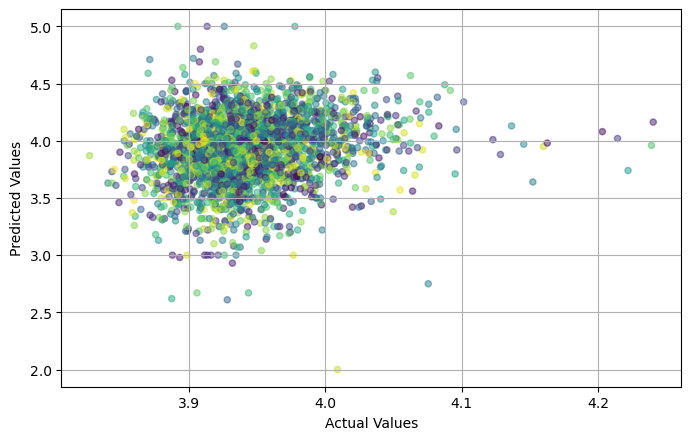

In [88]:
#plot predicted and actual value
plt.figure(num=None, figsize=(8, 5), dpi=100)
colors = np.random.rand(2729),
plt.scatter(lr_pre,y_test,s= 20.0,c=colors,alpha= 0.5)
plt.grid(True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [89]:
# evaluate the performance of the algorithm
from sklearn import metrics
#print('r2_score:',metrics.r2_score(y_test,predictions))
print('MAE:', metrics.mean_absolute_error(y_test, lr_pre))#平均绝对误差
print('MSE:', metrics.mean_squared_error(y_test, lr_pre))#均方误差
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pre)))#均方根误差

MAE: 0.22111517679210543
MSE: 0.08296138128879628
RMSE: 0.288030174267899


we used cross-validation to do th prediction, however, the value of MSE has increased.

In [90]:
#using cross-validation
from sklearn.model_selection import cross_val_predict
lr_cv_pre = cross_val_predict(lr,X,y,cv=10)
print('MSE:', metrics.mean_squared_error(y, lr_cv_pre))#均方误差


MSE: 0.08545038273725807


## RandomForest

In [91]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 700,
                                     min_samples_split= 2,
                                     min_samples_leaf= 1, 
                                     max_features='auto',
                                     max_depth=100,
                                     bootstrap= True,
                                     random_state = 42)
model.fit(X_train,y_train)


RandomForestRegressor(max_depth=100, n_estimators=700, random_state=42)

In [92]:
rf_pre = model.predict(X_test)

In [93]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': rf_pre.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.50,3.898150
1,3.64,3.985500
2,4.11,4.217871
3,4.15,3.895340
4,3.99,4.014407
5,3.89,3.912457
6,3.85,3.856643
7,4.28,4.001405
8,3.79,3.981205
9,4.20,3.837586


Text(0, 0.5, 'Predicted Values')

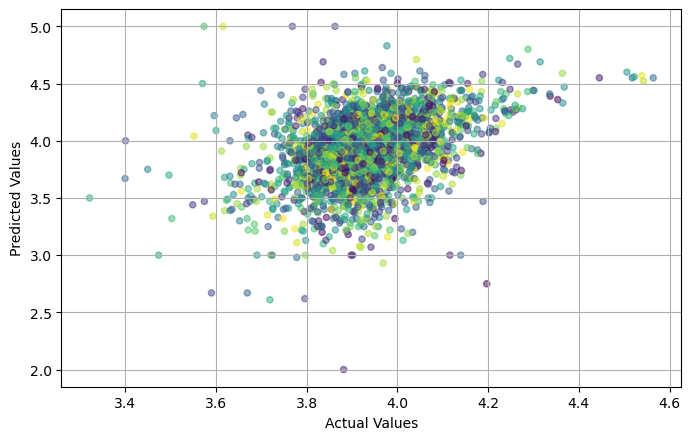

In [94]:
#plot predicted and actual value
plt.figure(num=None, figsize=(8, 5), dpi=100)
colors = np.random.rand(2729),
plt.scatter(rf_pre,y_test,s= 20.0,c=colors,alpha= 0.5)
plt.grid(True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [95]:
#print('r2_score:',metrics.r2_score(y_test, rf_pre))
print('MAE:', metrics.mean_absolute_error(y_test, rf_pre))#平均绝对误差
print('MSE:', metrics.mean_squared_error(y_test, rf_pre))#均方误差
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pre)))#均方根误差

MAE: 0.19933852031468502
MSE: 0.0707621540553726
RMSE: 0.2660115675217388


Value of MSE increased

In [96]:
#using cross-validation
rf_cv_pre = cross_val_predict(model,X,y,cv=10)
print('MSE:', metrics.mean_squared_error(y, rf_cv_pre))#均方误差

MSE: 0.0736313666622088


## XGboost

In [97]:
import xgboost as xgb

xgbt = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=160)
xgbt.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=160, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
xgbt_pre = xgbt.predict(X_test)

In [99]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': xgbt_pre.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.50,3.890367
1,3.64,3.928785
2,4.11,4.180290
3,4.15,3.941592
4,3.99,3.957729
5,3.89,3.884086
6,3.85,3.799340
7,4.28,3.991294
8,3.79,3.971450
9,4.20,3.895112


Text(0, 0.5, 'Predicted Values')

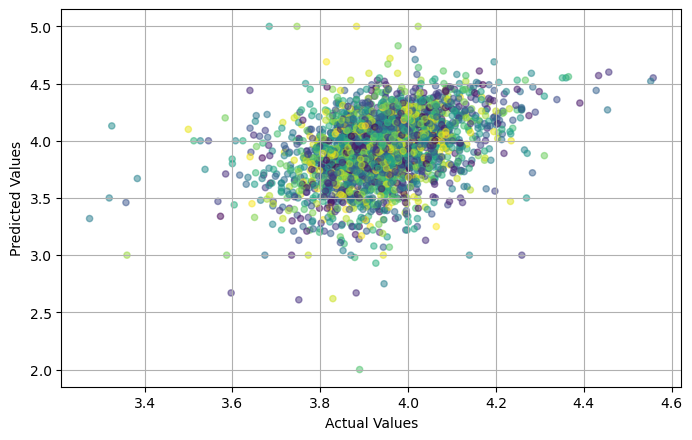

In [100]:
#plot predicted and actual value
plt.figure(num=None, figsize=(8, 5), dpi=100)
colors = np.random.rand(2729),
plt.scatter(xgbt_pre,y_test,s= 20.0,c=colors,alpha= 0.5)
plt.grid(True)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [101]:
print('MAE:', metrics.mean_absolute_error(y_test, xgbt_pre))#平均绝对误差
print('MSE:', metrics.mean_squared_error(y_test, xgbt_pre))#均方误差
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgbt_pre)))#均方根误差

MAE: 0.20414579736162808
MSE: 0.0728374008929677
RMSE: 0.2698840508310332


In [102]:
#using cross-validation
rf_cv_pre = cross_val_predict(xgbt,X,y,cv=10)
print('MSE:', metrics.mean_squared_error(y, rf_cv_pre))#均方误差

MSE: 0.07521117331649439
